In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns 

In [2]:
telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


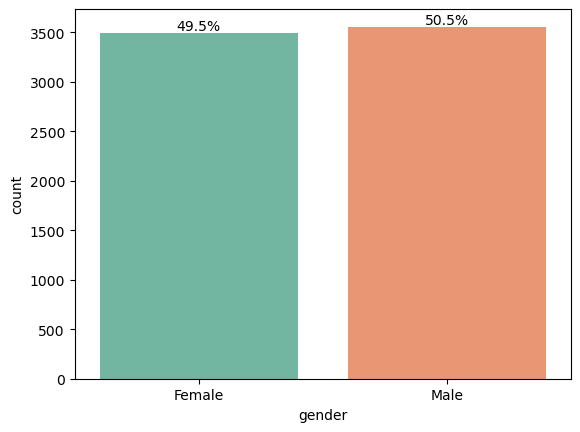

In [5]:
gender_plot = sns.countplot(data=telco_data, x='gender', palette = "Set2")
total = telco_data['gender'].count()
for x in gender_plot.containers:
    gender_plot.bar_label(x, fmt=lambda z: f'{(z/total)*100:0.1f}%')
plt.show()

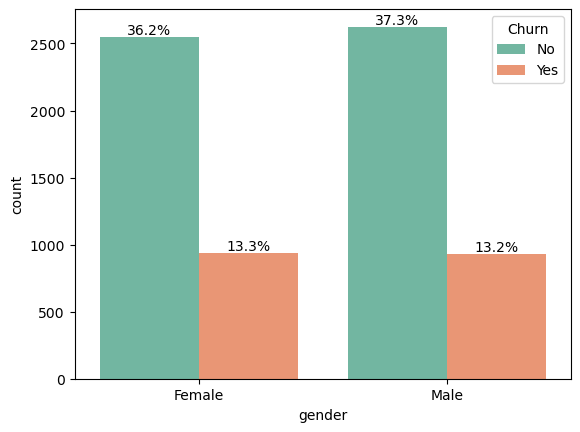

In [6]:
gender_plot = sns.countplot(data=telco_data, x='gender', hue = 'Churn', palette = "Set2")
total = telco_data['gender'].count()
for x in gender_plot.containers:
    gender_plot.bar_label(x, fmt=lambda z: f'{(z/total)*100:0.1f}%')
plt.show()

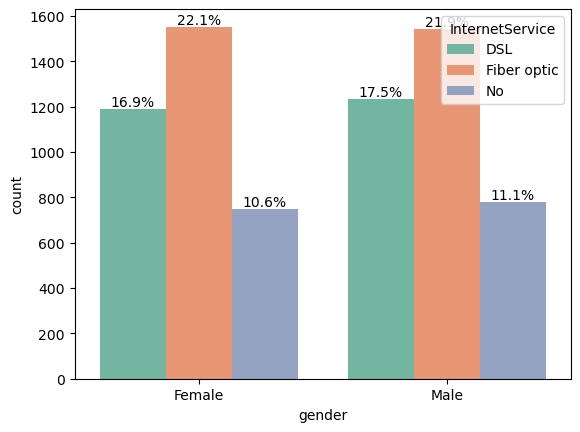

In [7]:
gender_plot = sns.countplot(data=telco_data, x='gender', hue = 'InternetService', palette = "Set2")
total = telco_data['gender'].count()
for x in gender_plot.containers:
    gender_plot.bar_label(x, fmt=lambda z: f'{(z/total)*100:0.1f}%')
plt.show()

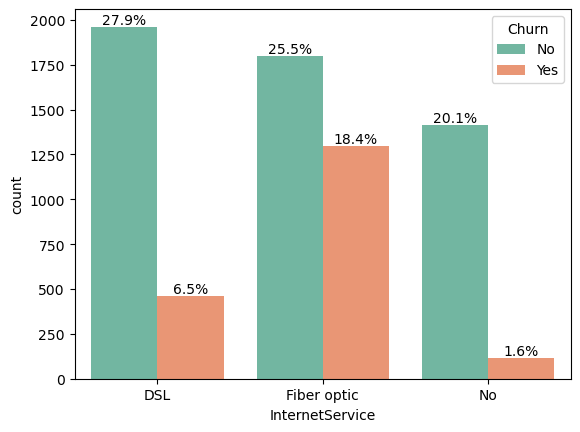

In [14]:
gender_plot = sns.countplot(data=telco_data, x='InternetService', hue = 'Churn', palette = "Set2")
total = telco_data['gender'].count()
for x in gender_plot.containers:
    gender_plot.bar_label(x, fmt=lambda z: f'{(z/total)*100:0.1f}%')
plt.show()

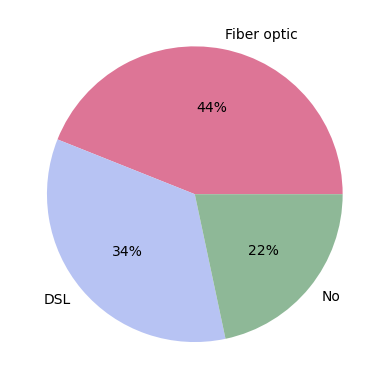

In [8]:
plt.pie(telco_data.InternetService.value_counts(), labels = telco_data.InternetService.value_counts().index,
        autopct = '%1.f%%', colors = ['#DD7596', '#B7C3F3', '#8EB897'])
plt.show()

In [9]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data['TotalCharges'].isnull().sum() 

11

<Axes: xlabel='TotalCharges', ylabel='Count'>

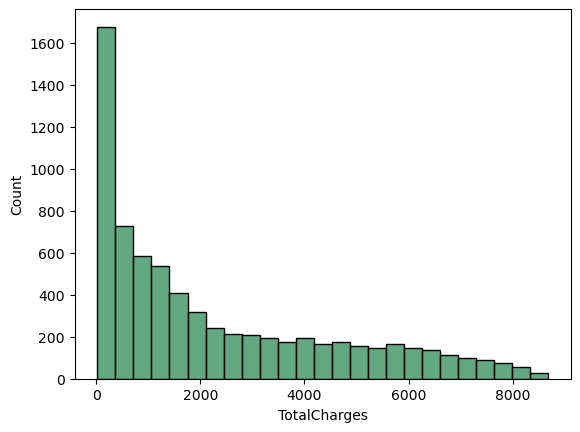

In [10]:
sns.histplot(pd.to_numeric(telco_data.TotalCharges,errors='coerce'), color='#2E8B57')

In [11]:
print("Mean:", telco_data['TotalCharges'].mean())
print("Median:", telco_data['TotalCharges'].median())

Mean: 2283.3004408418656
Median: 1397.475


In [12]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data['TotalCharges'].fillna(telco_data['TotalCharges'].median(), inplace=True)

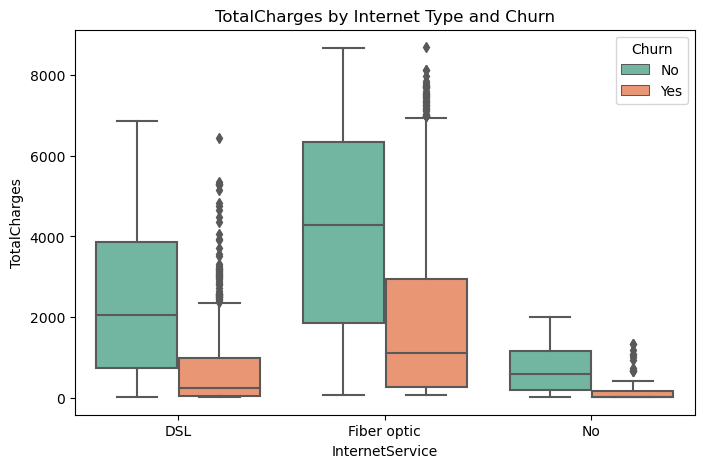

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=telco_data, x='InternetService', y='TotalCharges', hue='Churn', palette = "Set2")
plt.title("TotalCharges by Internet Type and Churn")
plt.show()